In [86]:
import helpy 
import velocity
import numpy as np

In [87]:
prefix = '/Users/zhejun/Document/Result/0622/result'

In [143]:
data.dtype

dtype({'names':['id','f','t','xy','x','y','o'], 'formats':['<u4','<u2','<i4',('<f4', (2,)),'<f4','<f4','<f4'], 'offsets':[0,4,6,10,10,14,18], 'itemsize':22})

In [175]:
data = helpy.load_data(prefix)

In [223]:
sum(np.isnan(data['o']))

1320

In [220]:
suma = 0
for i in data:
    if i['o'] >= 2*np.pi:
        suma += 1
print suma

0


In [216]:
tracksets = helpy.load_tracksets(data, run_track_orient = True,run_repair= 'interp')

In [194]:
suma = 0
for t, i in tracksets.iteritems():
    suma += (i['o'] > 2 * np.pi)
print sum(suma)

0


In [90]:
fpdata = helpy.load_framesets(data)

In [91]:
test_track = helpy.load_framesets(test_fp)

In [92]:
test_fp = {k: fpdata[k] for k in range(4000,5000)}

In [213]:
tracksets[182]['o'][400:408]

array([ 3.09555793,  3.14672685,  3.33266521,  2.12732053,  3.4072392 ,
        3.32960653,  3.44596004,  3.47203732], dtype=float32)

In [207]:
v_data[182]['o'][400:408]

array([ 3.09555793,  3.14672685,  3.33266521,  2.12732053,  3.4072392 ,
        3.32960653,  3.44596004,  3.47203732], dtype=float32)

In [206]:
v_data[182]['vo'][400:408]

array([ 0.02142191,  0.19898455, -1.11321497,  0.09466132,  1.34376597,
        0.12891026,  0.15887117, -0.04375562], dtype=float32)

In [205]:
np.where(v_data[182]['vo'] > 1)

(array([404]),)

In [214]:
track_prefix = {prefix: tracksets}
v_data = velocity.compile_noise(track_prefix, cat = False, side = 36, fps = 2.5, 
                           ring = True, x0= x0, y0 = y0)[prefix]

In [209]:
for t, i in v_data.iteritems():
    print i['vo'][i['vo'] > 0.4]
        

[ 0.41436908]
[ 0.42145216  0.41031626  0.44597647  0.44677326  0.41567448  0.40858087
  0.41883889  0.5081712   0.42413437  0.43085063  0.45213166]
[ 0.41141295  0.42894185  0.4929305 ]
[ 0.5844782   0.47939202  0.41911089  0.40414456  0.58207488  0.48277122
  0.47187549  0.44735888  0.43528545]
[ 0.40466768  0.46818793]
[ 0.57447922  0.51024848  0.41982022  0.41584292  0.4182843   0.46036944
  0.4967151   0.45062852  0.48334163  0.45743614  0.4909693   0.44557646
  0.43453404  0.40069515  0.44632694  0.43074626  0.4614498   0.41088489
  0.4261795 ]
[ 0.43063331  0.56549978  0.52839994  0.4383606   0.60934585  0.45089301
  0.41684034  0.40319723  0.40642846  0.41475159  0.5820235   0.41747826
  0.44681889  0.50638521  0.42871785  0.40405139  0.40873021  0.44533387
  0.46471596]
[ 0.4291746   0.40305427  0.40271175]
[ 0.4318105   0.48679811  0.40418419  0.41082346  0.40967867]
[ 0.43242288  0.4103854   0.48711836  0.41552532]
[ 0.40290117  0.42278981  0.54492843  0.42630196  0.41282415

In [119]:
a = np.array([1,2,np.nan, np.nan])

In [120]:
sum(np.isnan(a))

2

In [139]:
sumlen = 0
nanlen = 0
for t, vdata in v_data.iteritems():
    nanlen += sum(np.isnan(vdata['o']))
    sumlen += len(vdata)
print nanlen
print sumlen 

0
2359764


In [140]:
2359764/9999.0

236.0

In [99]:
f_data = helpy.load_framesets(v_data)

In [112]:
9999* 236 - sumlen

150

In [215]:
vtdata = velocity.compile_noise(track_prefix, cat = True, side = 36, fps = 2.5, 
                           ring = True, x0= x0, y0 = y0)

In [225]:
sum(np.isnan(vtdata['o']))

0

In [95]:
data = helpy.load_data(prefix)
meta = helpy.load_meta(prefix)
boundary = meta.get('boundary')
if boundary is None or boundary == [0.0]*3:
    boundary, path = find_boundary(prefix)
    meta.update(boundary = boundary)
    meta['path_to_tiffs'] = path
    helpy.save_meta(prefix, meta)
x0, y0, R = boundary
data['o'] = (data['o'] + np.pi)%(2 * np.pi)   # flip the detected orientation
tracksets = helpy.load_tracksets(data, run_track_orient=True)
track_prefix = {prefix: tracksets}

In [16]:
def data_filter(data, x0 , y0 , inner, outer):
    x = data['x']
    y = data['y']
    position = [x - x0, y - y0]
    distance = np.hypot(*position)
    legal = np.where((distance < outer) & (distance > inner))
    return legal

In [17]:
data998 = fpdata[9998]

In [18]:
legal = data_filter(data998, x0, y0, R - 36, R)

In [25]:
sorted(data998[legal]['t'])

[0,
 1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 16,
 17,
 19,
 22,
 25,
 26,
 27,
 32,
 35,
 37,
 38,
 45,
 49,
 50,
 52,
 56,
 57,
 59,
 62,
 66,
 67,
 75,
 76,
 77,
 82,
 83,
 86,
 92,
 95,
 106,
 111,
 113,
 119,
 120,
 125,
 126,
 128,
 129,
 131,
 136,
 141,
 147,
 156,
 157,
 162,
 164,
 167,
 168,
 169,
 176,
 186,
 192,
 194,
 198,
 201,
 203,
 208,
 211,
 224,
 228,
 230,
 231,
 233,
 234,
 236]

In [24]:
legal

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  13,  18,  19,
         23,  26,  34,  35,  43,  44,  50,  52,  59,  60,  65,  66,  70,
         71,  76,  77,  81,  82,  87,  88,  94,  95, 101, 102, 111, 112,
        119, 121, 127, 128, 134, 135, 141, 142, 148, 149, 156, 157, 164,
        165, 173, 174, 182, 183, 195, 198, 203, 207, 214, 215, 220, 221,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235]),)

In [26]:
test = tracksets[0]

In [28]:
v = velocity.ring_velocity_derivatives(test, width=(0.65,), side = 36, fps = 2.5, x0= x0, y0 = y0)

In [32]:
import matplotlib.pyplot as plt

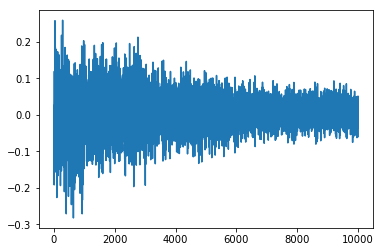

In [33]:
plt.plot(v['f'], v['vring'])
plt.show()

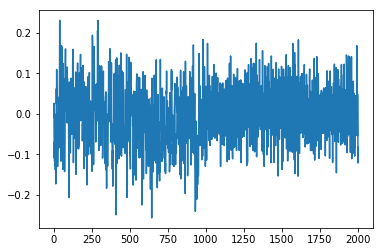

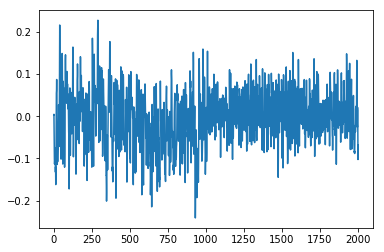

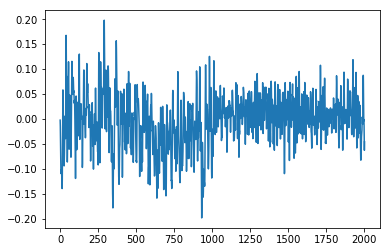

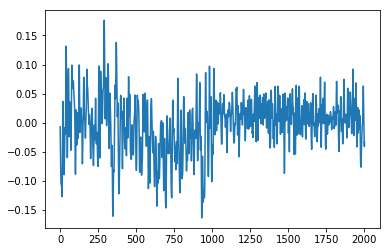

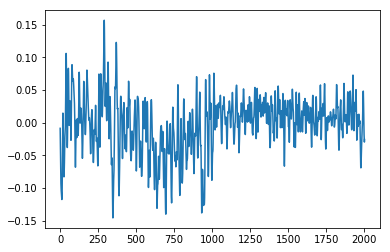

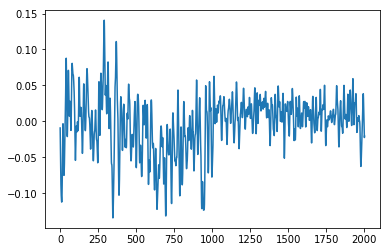

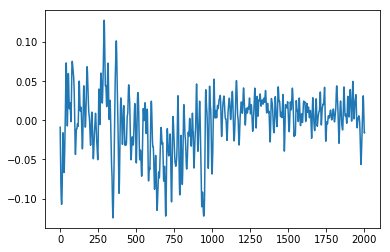

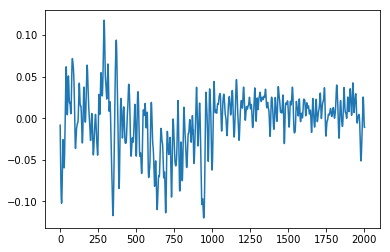

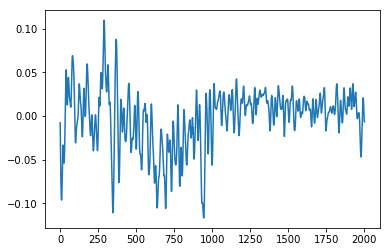

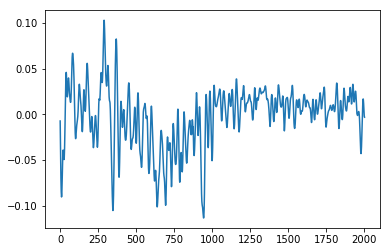

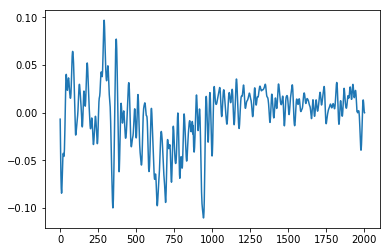

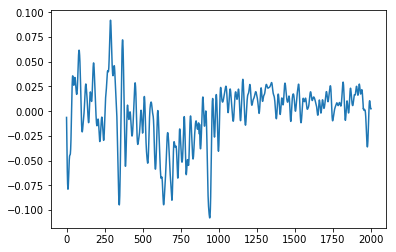

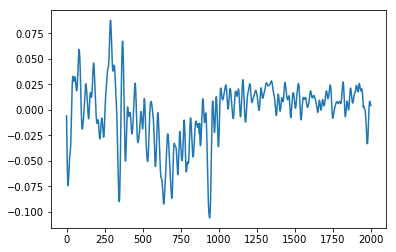

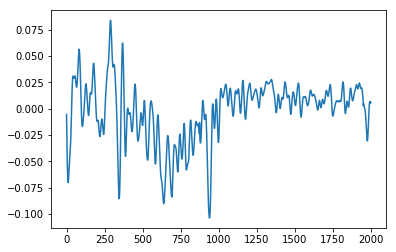

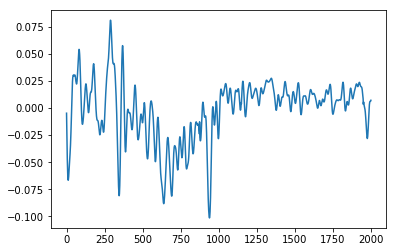

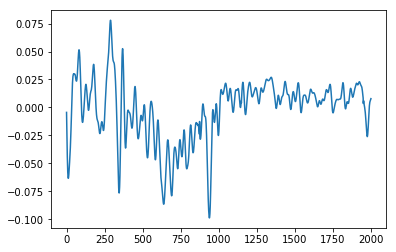

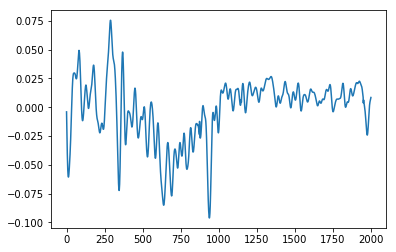

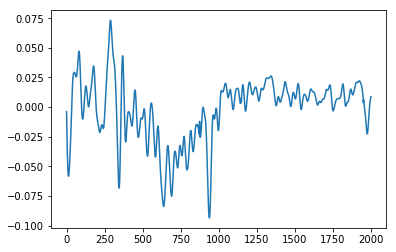

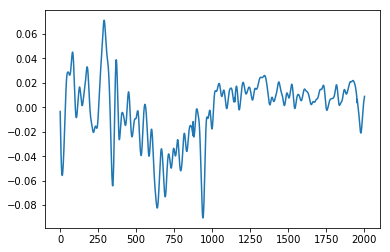

In [73]:
a = list()
b = list()
for iwidth in np.arange(0.5, 10, 0.5):
    v = velocity.ring_velocity_derivatives(test, width=(iwidth,), 
                                           side = 36, fps = 2.5, x0= x0, y0 = y0)
    plt.plot(v['f'][:2000], v['vring'][:2000])
    plt.show()

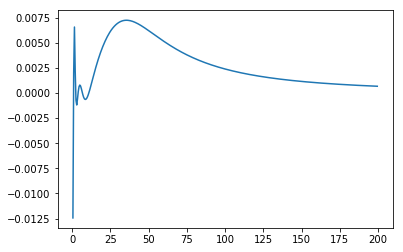

In [85]:
a = list()
b = list()
for iwidth in np.arange(0.5, 200, 0.5):
    v = velocity.ring_velocity_derivatives(test, width=(iwidth,), 
                                           side = 36, fps = 2.5, x0= x0, y0 = y0)
    a.append(iwidth)
    b.append(v[3000]['vring'])
plt.plot(a, b)
plt.show()

In [49]:
import curve as cur

In [50]:
xx = np.array(np.arange(0))

In [70]:
for width in np.arange(0.5, 10, 0.5):
    dxx = cur.der(xx,x =  xx, iwidth = width)
    print dxx[20]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [53]:
xx.cop

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [61]:
dxx

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
np.clip(4,3,5)

4

In [77]:
order = np.random.randn?

In [83]:
order = np.random.randn(1000)

numpy.ndarray

In [84]:
aaa = np.concatenate(order, np.nan)

ValueError: cannot convert float NaN to integer

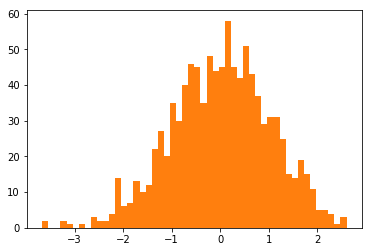

In [80]:
plt.hist(order, 50)
plt.show()